In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import confusion_matrix
import seaborn as sns

import plotly.graph_objs as go

In [ ]:
IBM_data = yf.download("IBM", start="2015-01-01", end="2022-01-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
IBM_data.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898


In [ ]:
IBM_data.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-30 00:00:00-05:00,133.75,134.369995,133.330002,133.910004,129.103745,3158100
2021-12-31 00:00:00-05:00,134.00,134.990005,133.610001,133.660004,128.862717,3362100


In [ ]:
IBM_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1763 entries, 2015-01-02 00:00:00-05:00 to 2021-12-31 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1763 non-null   float64
 1   High       1763 non-null   float64
 2   Low        1763 non-null   float64
 3   Close      1763 non-null   float64
 4   Adj Close  1763 non-null   float64
 5   Volume     1763 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 96.4 KB


In [ ]:
IBM_data.shape

(1763, 6)

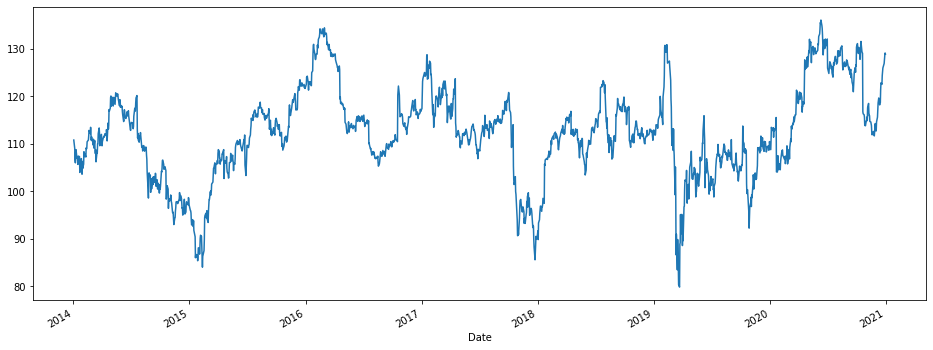

In [ ]:
IBM_data['Adj Close'].plot(figsize = (16,6))

In [ ]:
##Check for null values
IBM_data.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [ ]:
#Set up column for strategy 1
strategy1 = np.where(IBM_data['Adj Close'].shift(-1) > IBM_data['Adj Close'], 1, -1)
IBM_data['Strategy1'] = strategy1

IBM_data.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1
Date,,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673,-1
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898,-1
2015-01-06 00:00:00-05:00,152.648178,152.925430,148.346085,149.206497,106.687645,6429448,-1
2015-01-07 00:00:00-05:00,150.286804,150.286804,147.256210,148.231354,105.990341,4918083,1
2015-01-08 00:00:00-05:00,149.369019,152.045883,148.709366,151.453156,108.294060,4431693,1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = IBM_data[['Adj Close']]
yfeature = IBM_data['Strategy1']

xfeature.head()

,Adj Close
Date,
2015-01-02 00:00:00-05:00,110.782318
2015-01-05 00:00:00-05:00,109.039169
2015-01-06 00:00:00-05:00,106.687645
2015-01-07 00:00:00-05:00,105.990341
2015-01-08 00:00:00-05:00,108.294060


# Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
## Pre-feature scaling description
x_train.describe()

,Adj Close
count,1410.000000
mean,112.345099
std,9.533904
min,79.847000
25%,107.222914
50%,112.234531
75%,117.461323
max,135.368500


In [ ]:
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
scaler.data_min_

array([79.84700012])

In [ ]:
scaler.feature_range

(0, 1)

In [ ]:
scaler.transform(x_train)

array([[0.69329797],
       [0.4811381 ],
       [0.60750244],
       ...,
       [0.6720775 ],
       [0.5156162 ],
       [0.88652627]])

In [ ]:
S1listofmodels = []
S1listofaccuracies = []

S2listofmodels = []
S2listofaccuracies = []

# Strategy #1

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
S1listofmodels.append("KNN")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5014164305949008


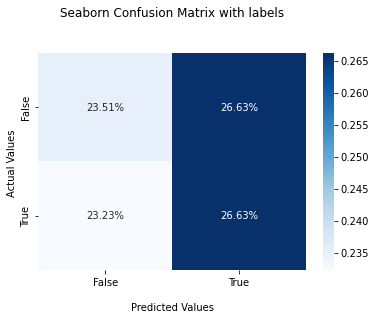

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()
##https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("Random Forest")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.5042492917847026


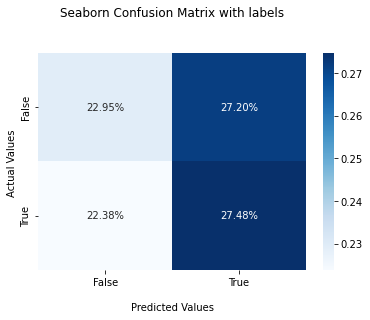

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=1, max_depth=2, random_state=0)
    gb_clf.fit(x_train, y_train)
    y_pred = gb_clf.predict(x_test)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

S1listofmodels.append("Gradient Boosting")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))
#https://stackabuse.com/gradient-boosting-classifiers-in-python-with-scikit-learn/

Learning rate:  0.05
Accuracy score: 0.510

Learning rate:  0.075
Accuracy score: 0.501

Learning rate:  0.1
Accuracy score: 0.507

Learning rate:  0.25
Accuracy score: 0.535

Learning rate:  0.5
Accuracy score: 0.535

Learning rate:  0.75
Accuracy score: 0.516

Learning rate:  1
Accuracy score: 0.516



In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = .05, max_features=1, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

Accuracy score: 0.510



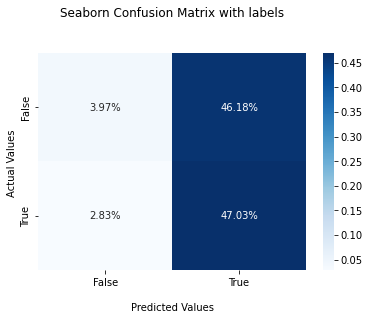

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()


## SVM

In [ ]:
from sklearn import svm

svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("SVM")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5127478753541076


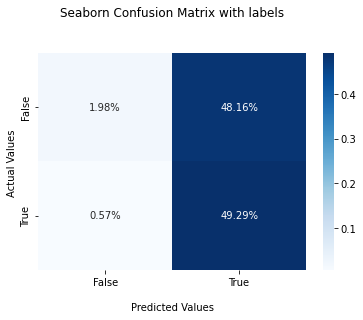

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## XG Boost

In [ ]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S1listofmodels.append("XGBoost")
S1listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5354107648725213


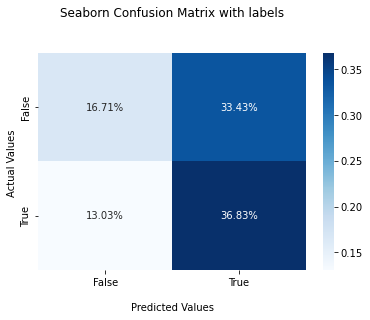

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Strategy #2

In [ ]:
# create 1 days simple moving average column
IBM_data['50_SMA'] = IBM_data['Close'].rolling(window = 50, min_periods = 1).mean()
# create 50 days simple moving average column
IBM_data['200_SMA'] = IBM_data['Close'].rolling(window = 200, min_periods = 1).mean()
# display first few rows
IBM_data.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50_SMA,200_SMA
Date,,,,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673,-1,154.933075,154.933075
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898,-1,153.714149,153.714149
2015-01-06 00:00:00-05:00,152.648178,152.925430,148.346085,149.206497,106.687645,6429448,-1,152.211599,152.211599
2015-01-07 00:00:00-05:00,150.286804,150.286804,147.256210,148.231354,105.990341,4918083,1,151.216537,151.216537
2015-01-08 00:00:00-05:00,149.369019,152.045883,148.709366,151.453156,108.294060,4431693,1,151.263861,151.263861


In [ ]:
IBM_data['Signal'] = 0.0
IBM_data['Signal'] = np.where(IBM_data['50_SMA'] > IBM_data['200_SMA'], 1.0, 0.0)

In [ ]:
IBM_data['Position'] = IBM_data['Signal'].diff()
# display first few rows
IBM_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50_SMA,200_SMA,Signal,Position
Date,,,,,,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673,-1,154.933075,154.933075,0.0,NaN
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898,-1,153.714149,153.714149,0.0,0.0


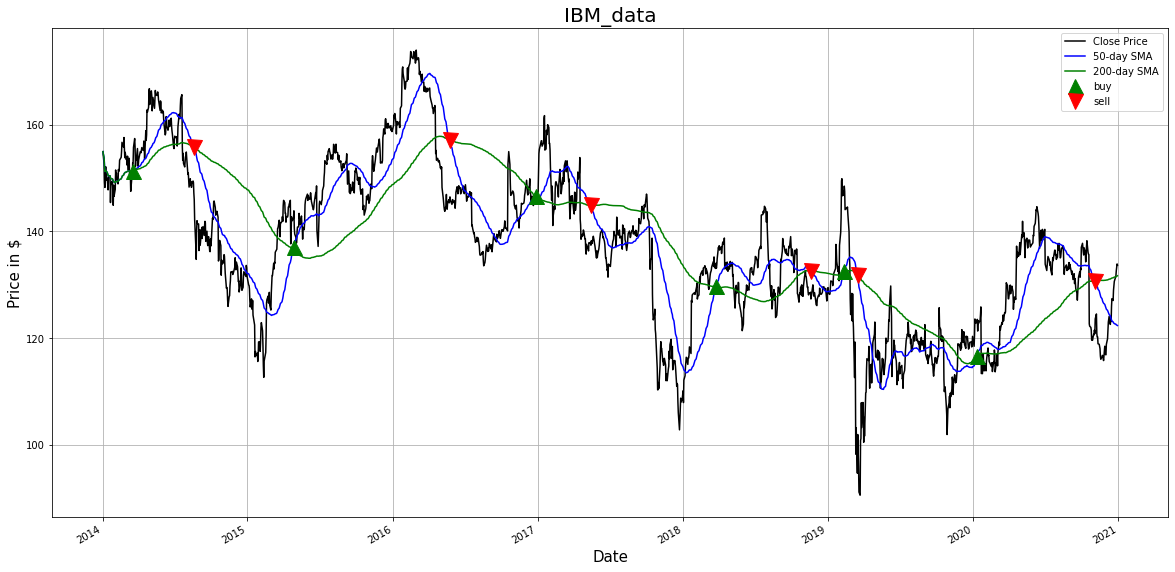

In [ ]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
IBM_data['Close'].plot(color = 'k', label= 'Close Price') 
IBM_data['50_SMA'].plot(color = 'b',label = '50-day SMA')
IBM_data['200_SMA'].plot(color = 'g', label = '200-day SMA')
# plot ‘buy’ signals
plt.plot(IBM_data[IBM_data['Position'] == 1].index, 
         IBM_data['50_SMA'][IBM_data['Position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot ‘sell’ signals
plt.plot(IBM_data[IBM_data['Position'] == -1].index, 
         IBM_data['200_SMA'][IBM_data['Position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in $', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('IBM_data', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [ ]:
##Calculating Averages

rolling_mean = IBM_data['Adj Close'].rolling(window=50).mean()
rolling_mean2 = IBM_data['Adj Close'].rolling(window=200).mean()

In [ ]:
##Set up collumn for strategy two
strategy2 = np.where(rolling_mean > rolling_mean2, 1, -1)
IBM_data["Strategy2"] = strategy2
IBM_data.head()

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50_SMA,200_SMA,Signal,Position,Strategy2
Date,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673,-1,154.933075,154.933075,0.0,NaN,-1
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898,-1,153.714149,153.714149,0.0,0.0,-1
2015-01-06 00:00:00-05:00,152.648178,152.925430,148.346085,149.206497,106.687645,6429448,-1,152.211599,152.211599,0.0,0.0,-1
2015-01-07 00:00:00-05:00,150.286804,150.286804,147.256210,148.231354,105.990341,4918083,1,151.216537,151.216537,0.0,0.0,-1
2015-01-08 00:00:00-05:00,149.369019,152.045883,148.709366,151.453156,108.294060,4431693,1,151.263861,151.263861,0.0,0.0,-1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = IBM_data[['Adj Close']]
yfeature = IBM_data['Strategy2']

xfeature.head()

,Adj Close
Date,
2015-01-02 00:00:00-05:00,110.782318
2015-01-05 00:00:00-05:00,109.039169
2015-01-06 00:00:00-05:00,106.687645
2015-01-07 00:00:00-05:00,105.990341
2015-01-08 00:00:00-05:00,108.294060


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
x_train.describe()

,Adj Close
count,1410.000000
mean,112.345099
std,9.533904
min,79.847000
25%,107.222914
50%,112.234531
75%,117.461323
max,135.368500


## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
knn_prediction = knn.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_prediction))

S2listofmodels.append("KNN")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7025495750708215


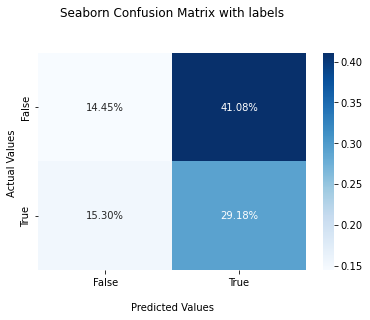

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 100)
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.660056657223796


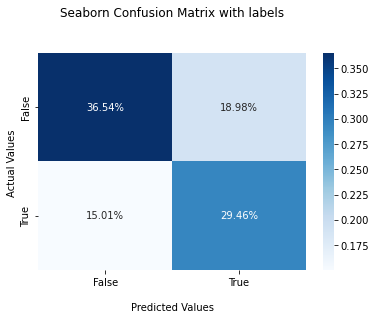

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=1, max_depth=2, random_state=1)
    gb_clf.fit(x_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))
    
    ## In gradient boosting, the learning rate corresponds to the weight of newly added predictions, to the original prediction.
    ## If the learning rate is high it means that adding new predictions has a greater affect on the original prediction.
    ## So, we expect higher learning rates to cause overfitting, the model learns to fit the data too quickly.  

Learning rate:  0.05
Accuracy score: 0.683

Learning rate:  0.075
Accuracy score: 0.683

Learning rate:  0.1
Accuracy score: 0.683

Learning rate:  0.25
Accuracy score: 0.703

Learning rate:  0.5
Accuracy score: 0.680

Learning rate:  0.75
Accuracy score: 0.691

Learning rate:  1
Accuracy score: 0.697



In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate = .05, max_features=1, max_depth=2, random_state=0)
gb_clf.fit(x_train, y_train)
y_pred = gb_clf.predict(x_test)
print("Accuracy score: {0:.3f}\n".format(gb_clf.score(x_test, y_test)))

S2listofmodels.append("Gradient Boosting")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy score: 0.683



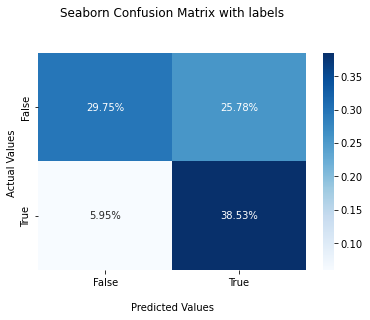

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## SVM

In [ ]:
svm_clf = svm.SVC()
svm_clf.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svm_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("SVM")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7025495750708215


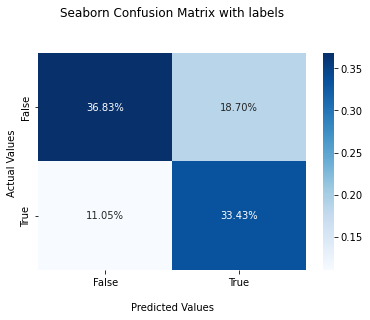

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

## XGBoost

In [ ]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_clf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("XGBoost")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6997167138810199


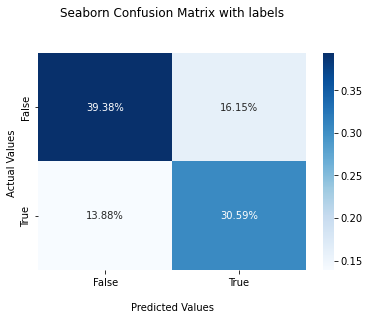

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

# Strategy #1 Results

In [ ]:
d = {
    'Algorithm': S1listofmodels,
    'Accuracy': S1listofaccuracies
}
df = pd.DataFrame(data=d)
df

,Algorithm,Accuracy
0,KNN,0.501416
1,Random Forest,0.504249
2,Gradient Boosting,0.515581
3,SVM,0.512748
4,XGBoost,0.535411


# Strategy #2 Results

In [ ]:
d = {
    'Algorithm': S2listofmodels,
    'Accuracy': S2listofaccuracies
}
df = pd.DataFrame(data=d)
df

,Algorithm,Accuracy
0,KNN,0.436261
1,Random Forest,0.660057
2,Gradient Boosting,0.682720
3,SVM,0.702550
4,XGBoost,0.699717


#**Bonus** : Try to tune some classifiers (you decide which ones, even 1 classifier suffices), by changing their default parameters.

**The ALMA indicator is a moving average (MA) variant**

As the name suggests, the ALMA indicator is a moving average (MA) variant and was created by Arnaud Legoux in 2009. The goal was to decrease the lag commonly encountered with moving averages.

As with most moving averages, this indicator aims to detect trends and trend reversals. It works similarly to other moving averages, but one of the main differentiators is that it calculates 2 moving averages, one from left to right and one from right to left. This output is then further processed through a customizable formula, for either increased smoothness or increased responsiveness.

Because of its similarity to a moving average, you’ll notice the applications are also similar.
*   Applying 2 ALMAs with different lengths can provide signals when they cross
*   Crosses between the price and an ALMA can provide signals
*   Combining any of the above with conditions derived from other indicators.

The ALMA was created with the goal of reducing the price lag usually associated with moving averages. As with most MAs, the Arnaud Legoux Moving Average is used to follow trends and detect trend reversals in price. In short, the ALMA helps you:



*   Identify trends 
*   Identify reversals in trends
*   Find confluence with other technical indicators






##**Random Forest**

In [ ]:
!pip install AlmaIndicator
from AlmaIndicator import ALMAIndicator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=22e976bf651a81450fe1e326fda122675278d48e18b58138507e64fe4f45da0b
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta


In [ ]:
alma = ALMAIndicator(close = IBM_data['Adj Close'])

In [ ]:
def calc_alma(dataset):
		alma = ALMAIndicator(close = dataset['Adj Close'])
		return (alma.alma())

In [ ]:
alma_nums = calc_alma(IBM_data)
alma_nums

Date
2015-01-02 00:00:00-05:00           NaN
2015-01-05 00:00:00-05:00           NaN
2015-01-06 00:00:00-05:00           NaN
2015-01-07 00:00:00-05:00           NaN
2015-01-08 00:00:00-05:00           NaN
                                ...    
2021-12-27 00:00:00-05:00    124.901958
2021-12-28 00:00:00-05:00    125.842611
2021-12-29 00:00:00-05:00    126.748651
2021-12-30 00:00:00-05:00    127.588956
2021-12-31 00:00:00-05:00    128.241225
Name: alma, Length: 1763, dtype: float64

In [ ]:
def calc_ema(dataset):
		return dataset['Adj Close'].ewm(com=0.4).mean()

In [ ]:
ema = calc_ema(IBM_data)
ema.shape

(1763,)

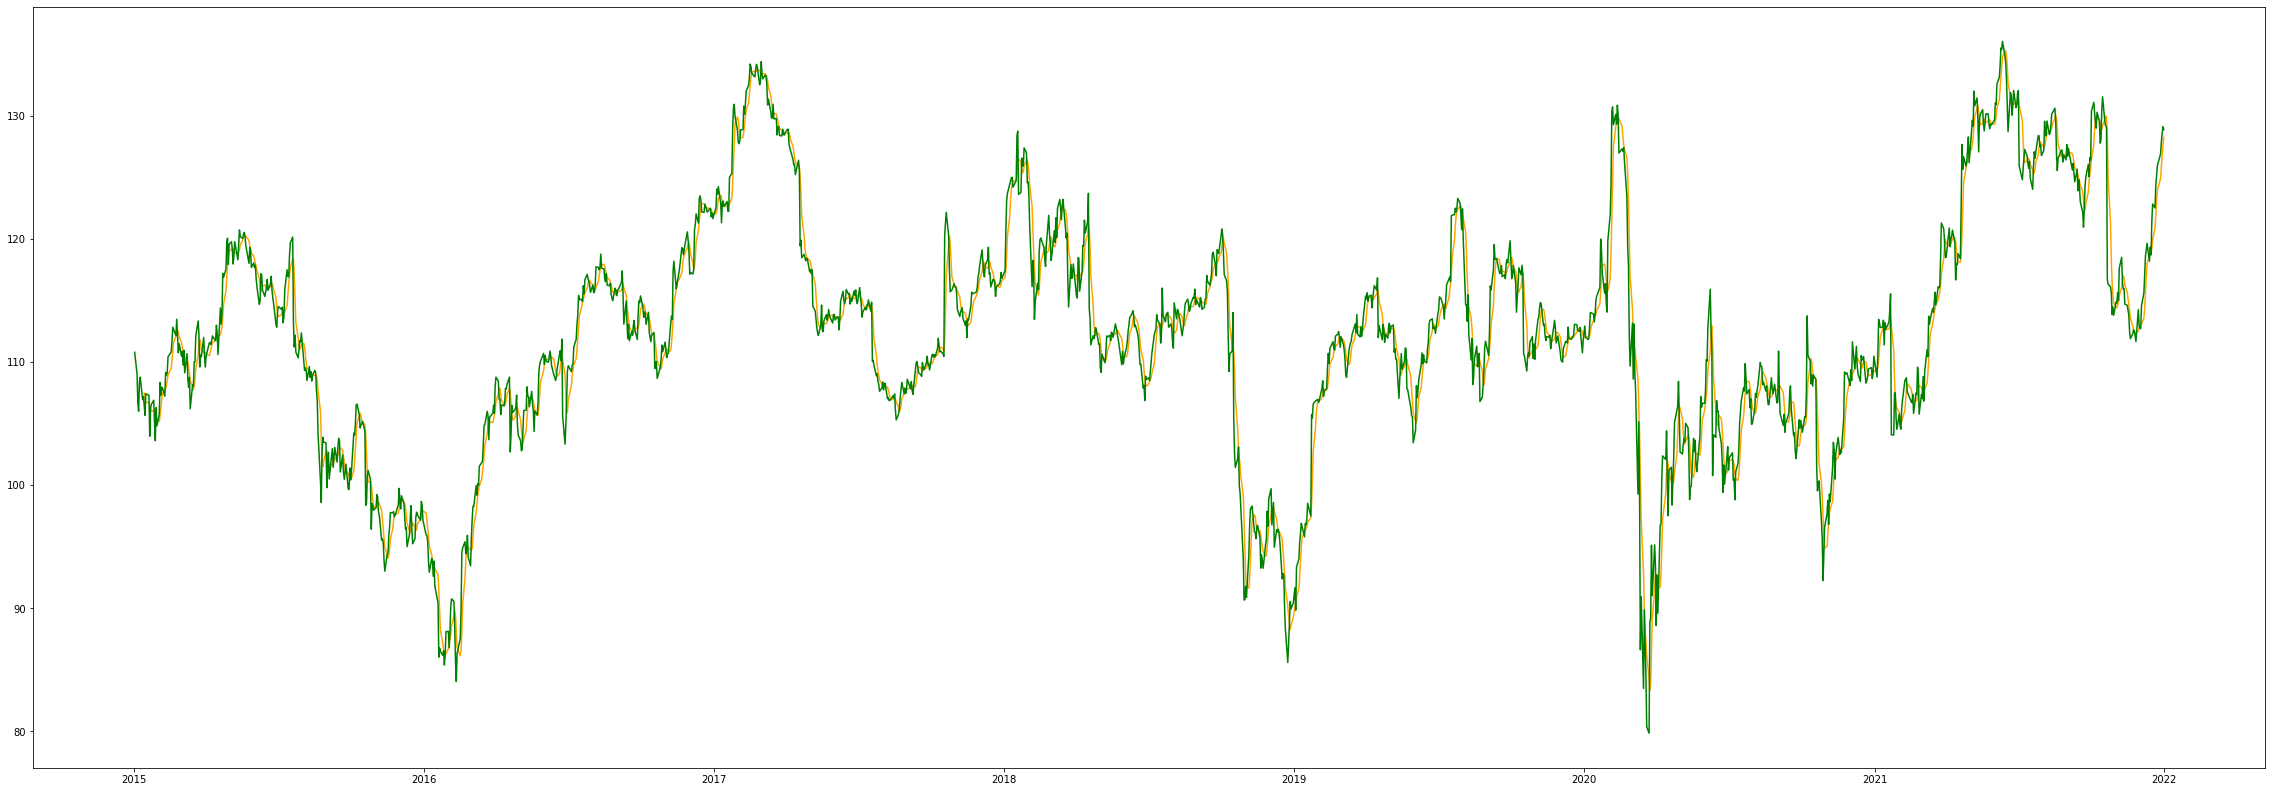

In [ ]:
plt.figure(figsize=(40,14))
plt.plot(alma_nums, color = 'orange')
plt.plot(IBM_data['Adj Close'], color = 'green')

In [ ]:
def strategy_three(dataset, ema, alma):
		return np.where(ema > alma, 1, -1)

In [ ]:
strategy3 = strategy_three(IBM_data, ema, alma_nums)
IBM_data["Strategy3"] = strategy3
IBM_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Strategy1,50_SMA,200_SMA,Signal,Position,Strategy2,Strategy3
Date,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,154.216064,156.128113,153.919693,154.933075,110.782318,5779673,-1,154.933075,154.933075,0.0,NaN,-1,-1
2015-01-05 00:00:00-05:00,154.177826,154.177826,152.189301,152.495224,109.039169,5104898,-1,153.714149,153.714149,0.0,0.0,-1,-1


In [ ]:
##Identifying Variables
##important to use double brackets

xfeature = IBM_data[['Adj Close']]
yfeature = IBM_data['Strategy3']

xfeature.head(2)

,Adj Close
Date,
2015-01-02 00:00:00-05:00,110.782318
2015-01-05 00:00:00-05:00,109.039169


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xfeature, yfeature, train_size = .8, random_state = 50)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
rf_clf = RandomForestClassifier(n_estimators = 1000, max_depth = 8)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=1000)

In [ ]:
y_pred = rf_clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

S2listofmodels.append("Random Forest - Strategy 3")
S2listofaccuracies.append(metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5580736543909348


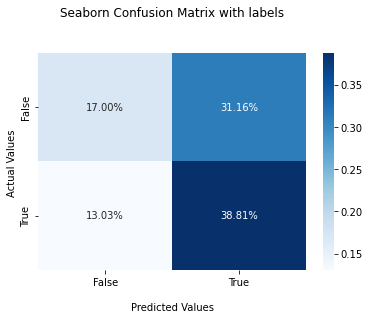

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
d = {
    'Algorithm': S2listofmodels,
    'Accuracy': S2listofaccuracies
}
df = pd.DataFrame(data=d)
df

,Algorithm,Accuracy
0,KNN,0.436261
1,Random Forest,0.660057
2,Gradient Boosting,0.682720
3,SVM,0.702550
4,XGBoost,0.699717
5,Random Forest - Strategy 3,0.558074
